<a href="https://colab.research.google.com/github/Juank114Gonzalez/Chancuco-SID/blob/master/Repaso_parcial_PL_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bloques  
Tienen 4 palabras clave:  
* Declare--Opcional
* Begin -Oblogatoria
* Exceptions -Opcional
* End -Oblogatoria


```
DECLARE
-- Variables
BEGIN
-- Ejecución
EXCEPTIONS
-- Excepciones
END -- Fin
```

#Variables  
Van en el DECLARE, máximo 30 caracteres de nombre. Tipos comunes de variables:  
* integer: Valores enteros.
* varchar2(n): String variable, n número de caracteres. default, para que tome un valor por defecto
* number(n): Valores enteros, n número de cifras.
* decimal(n,p): Valores decimales, n número de cifras totales, p número de decimales de las n cifras.
* date: Fechas ('dd-MON-yy'). to_date("fecha","yyyy,mm,dd"), método para asignación de fechas  


```
SET SERVEROUTPUT ON -- Para mostrar en consola
DECLARE
  id integer := 82;
  nombre varchar2(30):= 'Pedro Torres';
  apodo char(10):= 'peto82';
  puntuación number(6):= 850000;
  vip_multiplicador decimal(3,2):= 1.25;
  fecha_actual date:= (sysdate); -- sysdate para obtener la fecha del sistema
  fecha_nacimiento date:= to_date('2004/07/17', 'yyyy/mm/dd');
  saludo_init_juego default 'Hola!, Buenos días';

BEGIN
  dbms_output.put_line(saludo_init_juego); -- Imprimir por pantalla
  dbms_output.put_line(nombre || ' Alias: ' || apodo);

END;
```




# Constantes  
No permiten cambio de valor


```
DECLARE
  velocidad constant decimal(3,1):=10.5;
BEGIN
  dbms_output.put_line('La velocidad es: ' || velocidad);
END;
```



# Condicilanes  
Estructuras de control
* IF

```
DECLARE
  a number(2):= 10;
  b number(2):= 20;
  c number(2):=30;
  mayor number(2);
BEGIN
  if a > b then
    dbms_output.put_line(a || ' es mayor que ' || b);
  else
    dbms_output.put_line(b || ' es mayor que ' || a);
  end if;

  IF a > b AND a > c THEN
    mayor := a;
  ELSIF b > a AND b > c THEN
    mayor := b;
  ELSE
    mayor := c;
  END IF;

  DBMS_OUTPUT.PUT_LINE('El mayor valor es: ' || mayor);
END;
```
* CASE


```
CREATE or REPLACE FUNCTION dia_semana(dia int)
return varchar2
is
    dia_var2 varchar2(20);
    
    BEGIN
        dia_var2 := '';
        CASE dia
            when 1 then dia_var2:='Lunes';
            when 2 then dia_var2:='Martes';
            when 3 then dia_var2:='Miércoles';
            when 4 then dia_var2:='Jueves';
            when 5 then dia_var2:='Viernes';
            when 6 then dia_var2:='Sábado';
            when 7 then dia_var2:='Domingo';
            else dia_var2:='No es válido';
        end case;
        
        return dia_var2;
END;

select dia_semana(2) as dia from dual;
```




#Bucles  
Ciclos repetitivos. Tipos:  
* LOOP - END LOOP: bucle incondicional, exit para salir.


```
DECLARE
  cuenta integer:=10;
BEGIN
  dbms_output.put_line('Cuenta regresiva');
  LOOP
    dbms_output.put_line(cuenta);
    cuenta := cuenta - 1;
    if cuenta < 1 then
      exit;
    end if;
  END LOOP;
  dbms_output.put_line('BOOM!');

  dbms_output.put_line('Múltiplos de 10 hasta 100');
  LOOP
    dbms_output.put_line(cuenta);
    cuenta := cuenta + cuenta;
    exit when cuenta > 100;
  END LOOP;
END;
```

* WHILE


```
SET SERVEROUTPU ON;
DECLARE
    valor number(2):= 10;
BEGIN
    WHILE valor < 20 LOOP
        dbms_output.put_line('El valor es: '|| valor);
        valor := valor + 2;
    END LOOP;
END;
```


```
SET SERVEROUTPU ON;
DECLARE
    numero number:= 0;
    resultado number;
BEGIN
    dbms_output.put_line('Tabla del 10!');
    WHILE numero <=10 LOOP
        resultado := 10* numero;
        dbms_output.put_line('10x'|| numero || ' = '|| resultado);
        numero := numero + 1;
    END LOOP;
END;
```
* FOR
```
SET SERVEROUTPU ON;
DECLARE
    numero number(2);
BEGIN
    FOR numero IN 10..20 LOOP
        dbms_output.put_line('Valor del número: ' || numero);
    END LOOP;
END;
```
```
SET SERVEROUTPU ON;
BEGIN
    dbms_output.put_line('Cuenta regresiva!');
    FOR i IN REVERSE 0..10 LOOP
        dbms_output.put_line(i || '!');
    END LOOP;
    dbms_output.put_line('BOOM');
END;
```
```
SET SERVEROUTPU ON;
DECLARE
    tabla number:= 5;
BEGIN
    dbms_output.put_line('Tabla del '|| tabla ||'!');
    FOR i IN 1..10 LOOP
        dbms_output.put_line(tabla || 'x' || i || ' = ' || (i*tabla));
    END LOOP;
END;
```



# Strings  
Manejo de cadenas  


```
SET SERVEROUTPU ON;
DECLARE
    nombre varchar2(20);
    direccion varchar2(30);
    detalles clob;
    eleccion char(1);
BEGIN
    nombre := 'Juan Camilo';
    direccion := 'Carrera 8 #11 -47';
    detalles:= 'en esta variable se pueden almacenar grandes cantidades de texto';
    eleccion := 'y';

    if eleccion = 'y' then
        dbms_output.put_line('Nombre: ' || Nombre);
        dbms_output.put_line('Dirección: ' || direccion);
        dbms_output.put_line('Detalles: ' || detalles);
    end if;
END;
```



```
DECLARE
    saludo varchar2(20):= 'Hola a todos!';
BEGIN
    dbms_output.put_line(saludo);
    dbms_output.put_line(UPPER(saludo)); -- Mayúsculas
    dbms_output.put_line(LOWER(saludo)); -- Minúsculas
    dbms_output.put_line(INITCAP(saludo)); --Mayúscula primera letra
    dbms_output.put_line(SUBSTR(saludo, 2,3)); -- Desde i trae n caracteres
    dbms_output.put_line(INSTR(saludo, 'to')); -- Posición del caracter o la cadena
    
END;
```


```
SET SERVEROUTPU ON;
DECLARE
    saludo varchar2(30):= '####Hola a todos!####';
BEGIN
    dbms_output.put_line(RTRIM(saludo, '#')); --Quita los caracteres de la derecha
    dbms_output.put_line(LTRIM(saludo, '#')); --Quita los caracteres de la izquierda
    dbms_output.put_line(TRIM('#' from saludo)); --Quita los caracteres
END;
```




# Arreglos  
Estructura de dato para almacenar varios valores


```
SET SERVEROUTPU ON;
DECLARE
    type a_var2 is varray(5) of VARCHAR2(25);
    nombres a_var2;
BEGIN
    nombres := a_var2('Pepe', 'Pedro', 'Juan', 'Carlos', 'Jorge');
    
    for i in 1..5 loop
        dbms_output.put_line('Nombre #'||i||': '|| nombres(i));
    end loop;
END;
```



# EJEMPLO DE CREACIÓN DE SECUENCIA, TABLA Y TRIGGER:  


```
SET SERVEROUTPUT ON
-- Crear secuencia para generar el ID
CREATE SEQUENCE libros_seq
   START WITH 1
   INCREMENT BY 1
   NOMAXVALUE
   NOCYCLE
   NOCACHE;

-- Crear tabla "libros"
CREATE TABLE libros (
   id       NUMBER,
   nombre   VARCHAR2(50),
   precio   NUMBER(6,2)
);

-- Crear disparador para generar el ID automáticamente
CREATE OR REPLACE TRIGGER libros_trigger
   BEFORE INSERT ON libros
   FOR EACH ROW
BEGIN
   :NEW.id := libros_seq.NEXTVAL;
END;
/

truncate table libros;

-- Inserts de ejemplo
INSERT INTO libros (nombre, precio) VALUES ('Libro 1', 10.99);
INSERT INTO libros (nombre, precio) VALUES ('Libro 2', 19.99);
INSERT INTO libros (nombre, precio) VALUES ('Libro 3', 14.50);
INSERT INTO libros (nombre, precio) VALUES ('Libro 4', 8.75);

```
# Procedimientos
```
create or replace PROCEDURE aumentar_precios
AS
    BEGIN
        UPDATE libros SET precio = precio + (precio*.01);
END aumentar_precios;

EXECUTE aumentar_precios;
```




# PROCEDIMIENTO CON PARÁMETROS


```
create or replace procedure insert_libro(nombre_libro in varchar2, precio_libro in number)
as
    BEGIN
        INSERT INTO libros (nombre, precio) values (nombre_libro, precio_libro);
END  insert_libro;

execute insert_libro('Biblia', 300);
```


```
create or replace procedure print_libro(id_libro in number)
as
    nombre_libro varchar2(25);
    precio_libro decimal(6,2);
    
    BEGIN
        select nombre into nombre_libro from libros
        where id = id_libro;
        select precio into precio_libro from libros
        where id = id_libro;
        
        dbms_output.put_line('Nombre: '|| nombre_libro || 'Precio: ' || precio_libro);
END print_libro;
```




```
create or replace PROCEDURE aumentar_sueldo (antiguedad in number, porcentaje in number)
AS
    BEGIN
        UPDATE empleados SET sueldo = sueldo + (sueldo*porcentaje/100)
        WHERE (extract(year from(current_date)) - extract(year from fecha_ingreso)) > antiguedad;
END aumentar_sueldo;

EXECUTE aumentar_sueldo(10, 20);
```



# Funciones  


```
create or replace function mult2(numero in number)
return NUMBER
is 
BEGIN
    return numero*2;
END;

select mult2(5) as total from dual; -- Mostrar el resultado

```



```
create or replace function costoso(nombre_libro varchar2)
return varchar2
is
    costo varchar2(20);
    precio_libro number;
    begin
        costo := '';
        select precio into precio_libro from libros
        where nombre = nombre_libro;
        
        if precio_libro < 10 then
            costo:='Barato';
        ELSIF precio_libro > 70 then
            costo:='Costoso';
        ELSE
            costo:= 'Estandar';
        end if;
        
        return costo;
end;


Select id,precio,nombre,costoso(nombre) from libros;
```





# TRIGGERS
FUNCIONALIDADES:
* Conservar la integridad referencial y la coherencia entre los datos de distintas tablas
* Registrar los cambios que se efectúan sobre las tablas y la identidad de quien los realizó
* Relaizar cualquier acción cuando una tabla es modificada
* Insertar, actualizar o eliminar datos de una tabla asociada en forma automática

REGLAS:
* No son invocables directamente
* Al intentar modificar los datos de una tabla, los triggers se ejecutan automáticamente
* No reciben ni retornan parámetros
* No generan resusltados de consultas SQL

CLASIFICACIÓN:
* **Momento:** BEFORE antes o AFTER después de una sentencia SQL
* **Evento:** INSERT, UPDATE o DELETE, según sea la sentencia SQL
* **Nivel:** Si se ejecuta para cada fila afectada en la sentencia (FOR EACH ROW) o bien una única vez por sentencia independiente de las filas afectadas.



```
CREATE or REPLACE TRIGGER tr_insert_libros_rg
after INSERT
on libros
BEGIN
    insert into rg_insert_libros values(user, sysdate);
END tr_insert_libros_rg;
```
```
CREATE or REPLACE TRIGGER tr_delete_libros_rg
after DELETE
on libros
FOR EACH ROW
    BEGIN
        insert into rg_delete_libros values(user, sysdate);
END tr_delete_libros_rg;
```
```
CREATE or REPLACE TRIGGER tr_update_libros_rg
after UPDATE
on libros
    BEGIN
        INSERT INTO rg_update_libros values(user, sysdate);
END tr_update_libros_rg;
```


**MULTIPLES EVENTOS**


```
CREATE or REPLACE TRIGGER tr_control_libros_rg
before INSERT or UPDATE or DELETE
on libros
    BEGIN
        if inserting then
            INSERT INTO control_empleados values(user, sysdate, 'Ingreso');
        end if;

        if updating then
            INSERT INTO control_empleados values(user, sysdate, 'Actualización');
        end if;

        if deleting then
            INSERT INTO control_empleados values(user, sysdate, 'Borrado');
        end if;
END tr_control_libros_rg;
```
**:NEW & :OLD**
```
-- Crear disparador para generar el ID automáticamente
CREATE OR REPLACE TRIGGER libros_trigger
   BEFORE INSERT ON libros
   FOR EACH ROW
BEGIN
   :NEW.id := libros_seq.NEXTVAL;
END libros_trigger;
```

```
CREATE OR REPLACE TRIGGER tr_control_salario_empleados
   BEFORE UPDATE OF salario ON empleados
   FOR EACH ROW
BEGIN
   IF :OLD.salario <> :NEW.salario THEN
      INSERT INTO control_salarios (id_empleado, salario_antiguo, salario_nuevo, fecha_cambio)
      VALUES (:OLD.id_empleado, :OLD.salario, :NEW.salario, SYSDATE);
   END IF;
END tr_control_salario_empleados;
```
```
CREATE OR REPLACE TRIGGER tr_control_salario_empleados
   BEFORE UPDATE OF salario ON empleados
   FOR EACH ROW WHEN (OLD.salario <> :NEW.salario)
BEGIN
    INSERT INTO control_salarios (id_empleado, salario_antiguo, salario_nuevo, fecha_cambio) VALUES (:OLD.id_empleado, :OLD.salario, :NEW.salario, SYSDATE);
END tr_control_salario_empleados;
```



# ENABLE or DISABLE
Para ver los triggers asociados a una tabla:

```
select trigger_name, triggering_event, table_name, status
from user_triggers
where table_name = 'LIBROS';

ALTER TRIGGER libros_trigger disable;

select trigger_name, triggering_event, table_name, status
from user_triggers
where table_name = 'EMPLEADOS';

ALTER TRIGGER tr_control_salario_empleados disable;
```



# RAISE_APPLICATION_ERRORS  
Configurar un mensaje de error y un código para ese error.


```
CREATE or REPLACE TRIGGER tr_control_empleados
before INSERT OR UPDATE OR DELETE
ON empleados
FOR EACH ROW
    BEGIN
    if :new.sueldo>5000 then
        raise_application_error(-20000, 'SUELDO NO PUEDE SUPERAR LOS $50000.00');
    END IF;
    INSERT INTO control values(user, sysdate, 'INSERCIÓN');

    
    if :old.seccion = 'Gerencia' then
        raise_application_error(-20000, 'NO SE PUEDE ELIMINAR EL PUESTO DE GERENCIA');
    END IF;
    INSERT INTO control values(user, sysdate, 'ELIMINACIÓN');

    
    if updating('documento') then
        raise_application_error(-20000, 'NO SE PUEDE ACTUALIZAR EL NÚMERO DE DOCUMENTO');
    END IF;
    INSERT INTO control values(user, sysdate, 'ACTUALIZACIÓN');
END tr_control_empleados;
```



# CURSORES  
Se pueden definir como secciones de memoria útiles para manejar resultados de sentencias SQL.

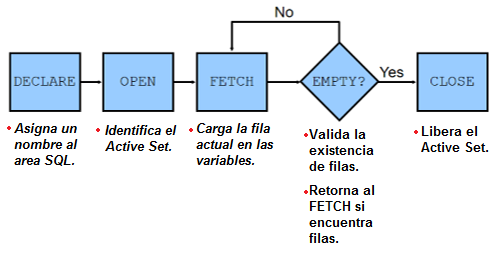


* **Implícitos:** Son definidos por el sistema, se usan cuando la sentencia SELECT retorna un solo reistro
* **Explícitos:** Son definidos por el sistema, se usan cuando la sentencia SELECT retorna varios registros

Contiene atributos:  

* **%ISOPEN:** true si este está abierto
* **%FOUND & %NOTFOUND:** true y false respectivamente si el registro pudo ser procesado y viceversa.
* **%ROWCOUNT:** Número de registros que han sido procesados



```
DECLARE
	filas number(2);
BEGIN
	update empleados set sueldo = sueldo + 500 where sueldo >= 3000;
    if sql%notfound then
    	dbms_output.put_line('NO HAY EMPLEADOS DISPONIBLES');
    elsif sql%FOUND then
    	filas:= sql%ROWCOUNT;
		dbms_output.put_line(filas || ' - Empleados actualizados');
	end if;
END;
```


```
DECLARE
	v_documento empleados.documento%type;
	v_nombre empleados.nombre%type;
	v_apellido empleados.apellido%type;
	v_sueldo empleados.sueldo%type;

	cursor c_cursor is
        select documento, nombre, apellido, sueldo from empleados
        where documento = 22222222;
BEGIN
	OPEN c_cursor;
	FETCH c_cursor into v_documento, v_nombre, v_apellido, v_sueldo;
	CLOSE c_cursor;

	dbms_output.put_line('Documento: ' || v_documento);
    dbms_output.put_line('Nombre: ' || v_nombre);
    dbms_output.put_line('Apellido: ' || v_apellido);
    dbms_output.put_line('Sueldo: ' || v_sueldo);
END;
```



# CURSORES CON SELECT Y UPDATE

```
DECLARE
	v_empleados empleados%rowtype;
BEGIN
	for v_empleados in (select * from empleados) loop
    	dbms_output.put_line(v_empleados.sueldo);
	end loop;
END;
```

```
BEGIN
    UPDATE empleados SET sueldo = 10000
    WHERE documento = '23333333';

    if sql%NOTFOUND then
        dbms_output.put_line('NO SE HAN ENCONTRADO REGISTROS PARA ACTUALIZAR');
    END IF;

END;
```



# CURSORES CON PARÁMETROS


```
DECLARE
	v_nombre productos.nombre_producto%type;
	v_precio productos.precio%type;

	CURSOR c_productos (id_prod productos.id_producto%type)
        is
        SELECT nombre_producto, precio from productos
        where id_producto = id_prod;
BEGIN
	open c_productos(2);
	loop
    	fetch c_productos into v_nombre, v_precio;
		exit when c_productos%notfound;
		dbms_output.put_line('Artículo: ' || v_nombre || ' Precio: ' || v_precio);
	end loop;
	close c_productos;
END;
```



# REF CURSORS


```
CREATE or REPLACE FUNCTION f_datos_empleados(v_documento in number)
return sys_refcursor
is
 v_ref sys_refcursor;
BEGIN
	open v_ref for select * from empleados
	where documento = v_documento;
	return v_ref;
END;
```
Para ver los resultados:

```
var rc1 refcursor
exec :rc1:= f_datos_empleados(22222222);
print rc1;
```



